### Training: Regularization

Regularization in deep learning is a crucial technique to prevent overfitting, where a model performs well on training data but poorly on unseen data. Overfitting often occurs in complex models like deep neural networks that have a large number of parameters. Regularization methods add certain constraints to the model or modify the learning process to enhance its generalization capabilities.

#### Motivation for Regularizers

1. **Model Complexity:** Deep learning models, due to their high flexibility and capacity, can easily capture noise and random fluctuations in the training data. This leads to overfitting.
2. **Generalization:** The goal of a model is not just to learn the training data but to make accurate predictions on new, unseen data. Regularization techniques help in achieving this by making the model less sensitive to individual fluctuations in the training data.
3. **Improving Robustness:** Regularization can also improve the robustness of models, making them less likely to be influenced by small variations or corrupted inputs.

Here, we'll cover L1 and L2 Regularization, Dropout, and max norm regularization.


### L1 and L2 Regularization

L1 and L2 regularization are used to penalize large weights in linear model, and are especially important when dealing with high-dimensional data or scenarios where overfitting is a concern. Let's explore these concepts starting with their application in linear models.

#### L1 Regularization (Lasso)

1. **Concept:**
   - L1 regularization adds a penalty equal to the absolute value of the magnitude of coefficients to the loss function.
   - Mathematically, for a linear model with weights $ \mathbf{w} $, the L1 regularized loss is: $ \text{Loss} = \text{MSE} + \lambda \sum |w_i| $, where MSE is Mean Squared Error and $ \lambda $ is the regularization parameter.

2. **Sparsity:**
   - L1 regularization tends to produce sparse models, where some coefficients can become exactly zero. This is useful for feature selection, making L1 regularization a tool for identifying important features in the data.

3. **Use Cases:**
   - Particularly beneficial in scenarios where some features are irrelevant or redundant.

#### L2 Regularization (Ridge)

1. **Concept:**
   - L2 regularization adds a penalty equal to the square of the magnitude of coefficients.
   - The L2 regularized loss for a linear model is: $ \text{Loss} = \text{MSE} + \lambda \sum w_i^2 $.

2. **Weight Shrinking:**
   - Unlike L1, L2 regularization doesn’t lead to sparse models. Instead, it shrinks the weights towards zero but rarely reaches zero. This leads to smaller and more distributed weight values, which helps in preventing overfitting.

3. **Use Cases:**
   - Ideal for problems where all features have relevance or when you have collinear (correlated) features.


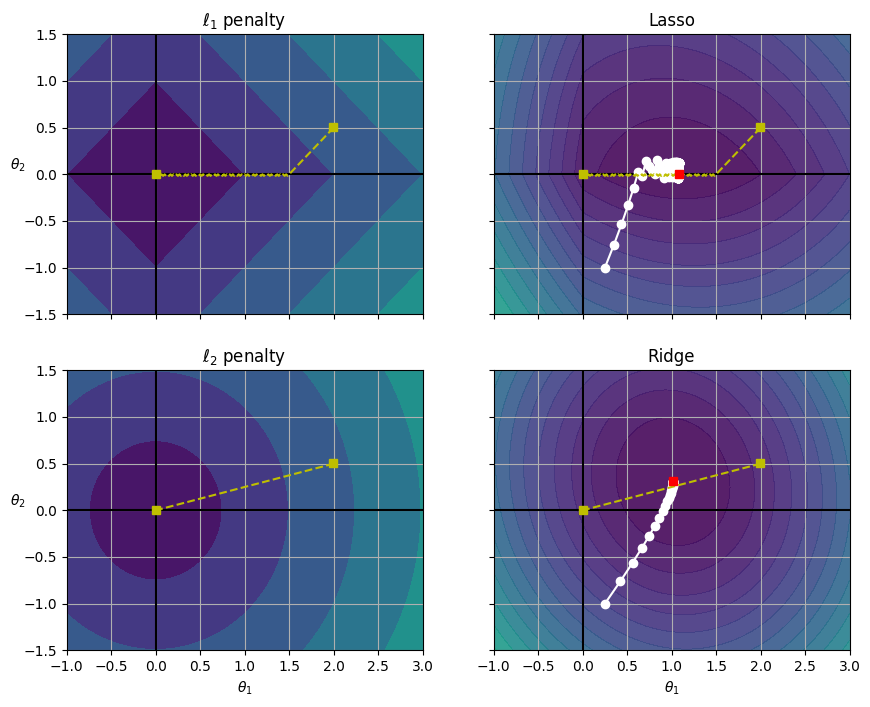

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")


### Extending L1/L2 Regularization to Deep Learning

In deep learning, L1 and L2 regularization concepts extend beyond linear models to complex networks. Just like in linear models, L1 and L2 regularization in neural networks involve adding a penalty term to the loss function. This penalty is calculated based on the weights of the network layers.

- **Choice Between L1 and L2:**
  - The choice between L1 and L2 regularization in neural networks can depend on the network architecture and the nature of the data. L2 is more common in deep learning due to its tendency to encourage smaller weights, thus smoothing the learned function.  However, L1 can lead to sparser networks, which require less memory and can run faster than in less sparse networks.
  
- **Hyperparameter Tuning:**
  - The regularization parameter $ \lambda $ controls the trade-off between fitting the training data and keeping the model weights small, and it's usually tuned using cross-validation.

- **Impact on Learning:**
  - Regularization can affect the learning dynamics. It's important to monitor both training and validation performance to understand the impact and adjust the regularization strength accordingly.  Importantly, L2 regularization is fine when using SGD, momentum optimization and Nesterov momentum optimization, but not with Adam and its variants. If you want to use Adam with weight decay, then do not use l2 regularization: use AdamW instead.


In [5]:
#Setting up some data

import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

2023-11-30 18:13:44.081487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
layer = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

Or use `l1(0.1)` for l1 regularization with a factor of 0.1, or `l1_l2(0.1, 0.01)` for both l1 and l2 regularization, with factors 0.1 and 0.01 respectively.

In [7]:
tf.random.set_seed(42) 

# The following is fancy code that allows us to partially initialize an object 

from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

In [8]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 3s 1ms/step - loss: 3.1374 - accuracy: 0.7745 - val_loss: 1.8689 - val_accuracy: 0.8196
Epoch 2/2
1719/1719 [==============================] - 2s 1ms/step - loss: 1.4323 - accuracy: 0.8135 - val_loss: 1.1334 - val_accuracy: 0.8158


### Exercise

Try different combinations of l1 and l2 regularizers (l1, l2, both, different alphas).  WHich seems to work the best?


#### Dropout

Dropout is a remarkably effective and widely used regularization technique in deep neural networks, introduced by Geoffrey Hinton and further detailed by Nitish Srivastava et al. Its simplicity and effectiveness in enhancing network generalization have made it a staple in many state-of-the-art architectures.

1. **Basic Idea:**
   - During training, dropout randomly "drops out" (i.e., temporarily deactivates) neurons in the network with a certain probability $ p $, known as the dropout rate.
   - This process is applied at every training step, and different neurons can be dropped in each step.


<div style="text-align:center">

![dropout](assets/dropout.png)
</div>

2. **Typical Dropout Rates:**
   - The dropout rate $ p $ typically ranges between 10% and 50%, varying with the network type:
     - Recurrent Neural Networks (RNNs): 20–30%
     - Convolutional Neural Networks (CNNs): 40–50%

#### Why Does Dropout Work?

- **Redundancy Reduction:** Just like a company diversifying skillsets among employees, dropout forces the network to spread "knowledge" across its neurons, making it more robust and less reliant on specific neurons.
- **Prevents Co-Adaptation:** Neurons become less sensitive to specific features or patterns in the input data, leading to a model that generalizes better.
- **Ensemble Interpretation:** Conceptually, each training step with dropout is training a different "thinned" network. The final model can be seen as an averaging ensemble of these various networks.


#### Adjusting Weights

Due to the deactivation of neurons during training, the effective number of neurons participating in the network is reduced. To compensate for this reduction, it's necessary to scale up the active neurons. More specifically, each neuron’s input connection weights are scaled by $ \frac{1}{1 - p} $ during training. This scaling ensures that the total input to a neuron at test time (when dropout is not applied) matches the expected total input during training.

#### Application in Deep Learning

- **Use in Different Layers:**
  - Dropout can be applied after dense layers, convolutional layers, or even recurrent layers, though the dropout rate might need adjustment depending on the layer type and the overall network architecture. In practice, you can usually apply dropout only to the neurons in the top one to three layers (excluding the output layer). 

- **Special Circumstances:**
  - If you want to regularize a self-normalizing network based on the SELU activation function (as discussed earlier), you should use alpha dropout: this is a variant of dropout that preserves the mean and standard deviation of its inputs. It was introduced in the same paper as SELU, as regular dropout would break self-normalization.

- **Balancing Dropout Rate:**
  - The choice of dropout rate is crucial; too high, and the network might underfit; too low, and the regularization effect might be insufficient. This rate is often determined through cross-validation.

- **Evaluation**
  - Since dropout is only active during training, comparing the training loss and the validation loss can be misleading. In particular, a model may be overfitting the training set and yet have similar training and validation losses. So make sure to evaluate the training loss without dropout (e.g., after training).

In [9]:
# In Keras, we add dropout by adding dropout layers

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [10]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6697 - accuracy: 0.7540 - val_loss: 0.4653 - val_accuracy: 0.8286
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5097 - accuracy: 0.8130 - val_loss: 0.4100 - val_accuracy: 0.8416
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4713 - accuracy: 0.8279 - val_loss: 0.3971 - val_accuracy: 0.8480
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4508 - accuracy: 0.8349 - val_loss: 0.3736 - val_accuracy: 0.8644
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4332 - accuracy: 0.8401 - val_loss: 0.3561 - val_accuracy: 0.8686
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4229 - accuracy: 0.8446 - val_loss: 0.3634 - val_accuracy: 0.8630
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4152 - accuracy: 0.8473 - val_loss: 0.3777 - val_accuracy:

The training accuracy looks like it's lower than the validation accuracy, but that's just because dropout is only active during training. If we evaluate the model on the training set after training (i.e., with dropout turned off), we get the "real" training accuracy, which is very slightly higher than the validation accuracy and the test accuracy:

In [11]:
model.evaluate(X_train, y_train)

1719/1719 [==============================] - 2s 1ms/step - loss: 0.3175 - accuracy: 0.8833


[0.3175168037414551, 0.8832545280456543]

**Note:** make sure to use AlphaDropout instead of Dropout if you want to build a self-normalizing neural net using SELU.

### Monte Carlo Dropout

Monte Carlo (MC) Dropout is an extension of the standard dropout technique, allowing it to be used not just as a regularizer during training but also as a tool for estimating model uncertainty during inference. This method was introduced in a paper by Yarin Gal and Zoubin Ghahramani, providing a theoretical foundation linking dropout with Bayesian approximation.

1. **Standard Dropout:**
   - In traditional dropout, random neurons are deactivated during training to prevent overfitting. However, during inference (model evaluation or prediction), dropout is usually disabled, and the network operates with all neurons active.

2. **Monte Carlo Dropout:**
   - MC Dropout proposes to keep dropout active even during inference. By doing so, it effectively turns the neural network into a probabilistic model.
   - Each forward pass with dropout enabled generates slightly different predictions, capturing the model's uncertainty. By running the network multiple times (each time with a different dropout configuration), we can obtain a distribution of predictions.

#### Theoretical Motivation

- **Bayesian Approximation:**
  - The key theoretical insight of MC Dropout is its interpretation as a form of Bayesian approximation. In Bayesian statistics, model uncertainty is captured by the distribution over possible models given the data.
  - MC Dropout can be seen as approximating this Bayesian averaging process. Each dropout mask (pattern of dropped neurons) can be viewed as sampling from the space of possible network configurations, akin to sampling from a posterior distribution of models.
  
- **Estimating Uncertainty:**
  - This process allows the network to express its "uncertainty" in predictions. For inputs where the model is less certain, the variance in the predictions across different dropout configurations will be higher.

#### Implementation and Usage

- **Implementation in Keras:**
  - To implement MC Dropout, one simply continues to use dropout layers in the network as usual. However, during inference, these dropout layers are kept active.
  - In Keras, this can be done by using the `training=True` argument when calling the model for prediction.

- **Practical Considerations:**
  - **Number of Forward Passes:** A key consideration is the number of forward passes to average over. More passes provide a better approximation of the uncertainty but at the cost of increased computation.
  - **Interpreting Results:** The spread of the predictions gives an insight into the model’s confidence. Wider spreads indicate lower confidence, and vice versa.



In [15]:
# All we have to do is set the "training=True" flag and use multiple models
# Note that this is just "bagging" with a set of neural networks
tf.random.set_seed(42)

y_probas = np.stack([model(X_test, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
model.predict(X_test[:1]).round(3)

1/1 [==============================] - 0s 33ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.017, 0.   , 0.227, 0.   ,
        0.757]], dtype=float32)

In [13]:
# However, the mean of all models is a bit less "certain"
y_proba[0].round(3)

array([0.   , 0.   , 0.001, 0.   , 0.   , 0.052, 0.001, 0.223, 0.003,
       0.719], dtype=float32)

In [14]:
# We can also examine std dev over all models to get an estimate of confidence
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([0.002, 0.001, 0.007, 0.002, 0.003, 0.079, 0.004, 0.165, 0.021,
       0.19 ], dtype=float32)

Apparently there’s quite a lot of variance in the probability estimates for class 9: the standard deviation is 0.19, which should be compared to the estimated probability of 0.719: if you were building a risk-sensitive system (e.g., a medical or financial system), you would probably treat such an uncertain prediction with extreme caution. 

**Using MC Dropout in Practice**

Note that in practice, other layers (e.g., BatchNormalization) might operate in special ways during training, so setting `training=true` is perhaps not what we want.  In order to handle this, it's relatively easy in Keras to create an MCDropout layer that turns on training during evaluation, like this:

In [16]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)

In [17]:
# The following converts all dropout layers to MCDropout
# extra code – shows how to convert Dropout to MCDropout in a Sequential model
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [18]:
mc_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 mc_dropout (MCDropout)      (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 mc_dropout_1 (MCDropout)    (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 mc_dropout_2 (MCDropout)    (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [19]:
# Now we can just use our modified network without setting training to true
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1])
         for sample in range(100)], axis=0).round(2)

1/1 [==============================] - 0s 20ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.23, 0.  , 0.71]],
      dtype=float32)



#### Max-Norm Regularization

Max-Norm regularization is a technique used in training neural networks that imposes a constraint on the weights of the neurons. This constraint limits the norm (i.e., the magnitude) of the vector of weights of incoming connections to a neuron.

#### Concept and Mechanism

1. **Max-Norm Constraint:**
   - In Max-Norm regularization, for each neuron, the norm of its incoming weight vector is constrained to not exceed a predefined threshold, typically denoted as $ r $. 
   - Mathematically, if $ \mathbf{w} $ is the weight vector for a neuron, then Max-Norm regularization ensures that $\|\mathbf{w}\|_2 \leq r $, where $\|\mathbf{w}\|_2$ is the $ l_2 $-norm (Euclidean norm) of $ \mathbf{w} $.

2. **Application During Training:**
   - After each training step (e.g., after a mini-batch update), the weight vectors of the neurons are checked. If the norm of a weight vector exceeds $ r $, it is scaled down to satisfy the Max-Norm constraint.

#### Theoretical Motivation

- **Preventing Exploding Weights:**
  - Max-Norm regularization primarily helps in preventing the weights from growing too large, which can be a common issue leading to exploding gradients, especially in deep or recurrent neural networks.
  - By keeping the weights small, it can help improve the overall stability of the learning process.

- **Regularization Effect:**
  - Similar to L1 and L2 regularization, Max-Norm has a regularizing effect, which helps in reducing overfitting and improving the generalization of the model.

#### Implementation in Keras

- **Using `kernel_constraint`:**
  - In Keras, Max-Norm regularization is implemented using the `kernel_constraint` parameter in layer constructors. The `MaxNorm` constraint can be applied as follows:

    ```python
    from tensorflow.keras.constraints import MaxNorm

    model.add(tf.keras.layers.Dense(64, kernel_constraint=MaxNorm(max_value=2.0)))
    ```

#### Practical Considerations

- **Choosing the Max-Norm Value (`r`):**
  - The choice of the Max-Norm threshold $ r $ is a hyperparameter that can be tuned based on the specific problem and dataset. A smaller $ r $ imposes a stronger constraint on the weights.
  - It's often determined through experimentation and cross-validation.

- **Compatibility with Other Regularization Techniques:**
  - Max-Norm regularization can be used alongside other regularization techniques, such as dropout or L1/L2 regularization, to compound the benefits.

- **Effectiveness in Different Network Types:**
  - While useful in a wide range of networks, Max-Norm regularization can be particularly effective in recurrent neural networks (RNNs), where exploding gradients are more common.

In [20]:
# Here's how to implement max-norm in a single layer.

dense = tf.keras.layers.Dense(
    100, activation="relu", kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.))


In [21]:
# However, you can also use the "partial" method above to create a lightweight MaxNormDense layer

from functools import partial

MaxNormDense = partial(tf.keras.layers.Dense,
                       activation="relu", kernel_initializer="he_normal",
                       kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation="softmax")
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5446 - accuracy: 0.8040 - val_loss: 0.4439 - val_accuracy: 0.8300
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4104 - accuracy: 0.8498 - val_loss: 0.4098 - val_accuracy: 0.8440
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8615 - val_loss: 0.3600 - val_accuracy: 0.8690
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3597 - accuracy: 0.8681 - val_loss: 0.3462 - val_accuracy: 0.8714
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3445 - accuracy: 0.8721 - val_loss: 0.3532 - val_accuracy: 0.8654
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3365 - accuracy: 0.8758 - val_loss: 0.3903 - val_accuracy: 0.8622
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3277 - accuracy: 0.8774 - val_loss: 0.3935 - val_accuracy:

### Exercise

1. Build two networks for processing the MNIST Fashion data.  Both networks should have three dense layers (but may also have dropout layers or activation function layers) with 100 neurons.

    1.  A self-normalizing neural network with dropout.
    2.  A network without normalization but using dropout.
    3.  A network with BatchNormalization.

Try each with either a 1cycle or performance schedule.  Which works the best?

